# **Tutorial 8**


### Imports

In [1]:
import numpy as np # arrays, array operations
import scipy.stats as stats # statistics
from google.colab import files
import matplotlib.pyplot as plt # plot graphs
import pandas as pd #dataframes
import io
import xarray as xr #multidimensional dataframes
import pymc as pm
import arviz as az
import seaborn as sns
import scipy.interpolate as interpolate

#preliz
!pip install preliz
import preliz as pz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.4/519.4 kB 6.5 MB/s eta 0:00:00


### Water Contamination Example - Hierarchical Model

In [ ]:
#creating data
N_samples = [30, 30, 30]
G_samples = [18, 18, 18]
group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
data = []
for i in range(0, len(N_samples)):
  data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]-G_samples[i]]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Model 1

In [ ]:
coords = {"neighborhood": np.arange(len(N_samples)), "neighborhood_data": group_idx}

with pm.Model(coords = coords) as model_h1:
  # hypyerpriors
  mu = pm.Beta('mu', 1, 1)
  nu = pm.HalfNormal('nu', 10)
  # prior
  theta = pm.Beta('theta', mu=mu, nu=nu, dims = "neighborhood")
  # likelihood
  y = pm.Bernoulli('y', p=theta[group_idx], observed = data, dims = "neighborhood_data")

  idata_h1 = pm.sample(1000, chains = 4)

Output()

Posterior

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

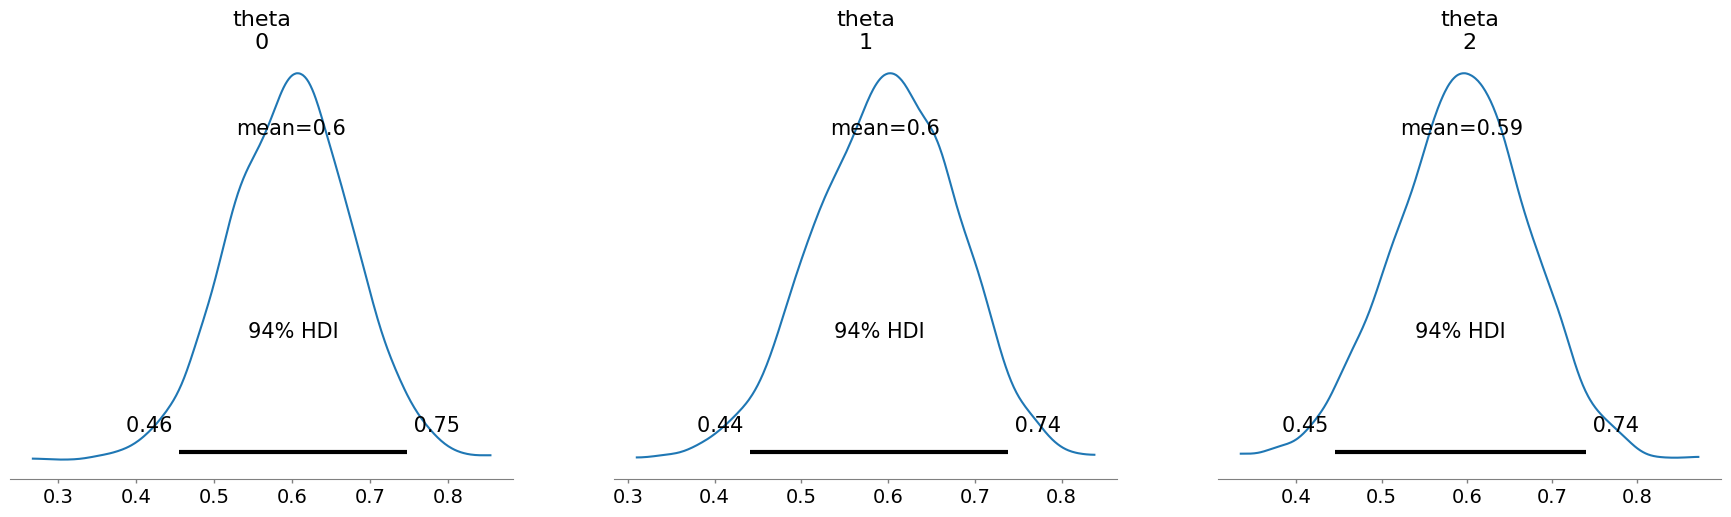

In [ ]:
#trace data
az.plot_trace(idata_h1, compact = False)
plt.subplots_adjust(hspace=0.6)  # Increase spacing between subplots

plt.savefig("tracegroup.png", bbox_inches='tight')
files.download("tracegroup.png")

#hdi and mean
az.plot_posterior(idata_h1, var_names=["theta"])

plt.savefig("hdi1.png", bbox_inches='tight')
files.download("hdi1.png")

Shrinkage

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

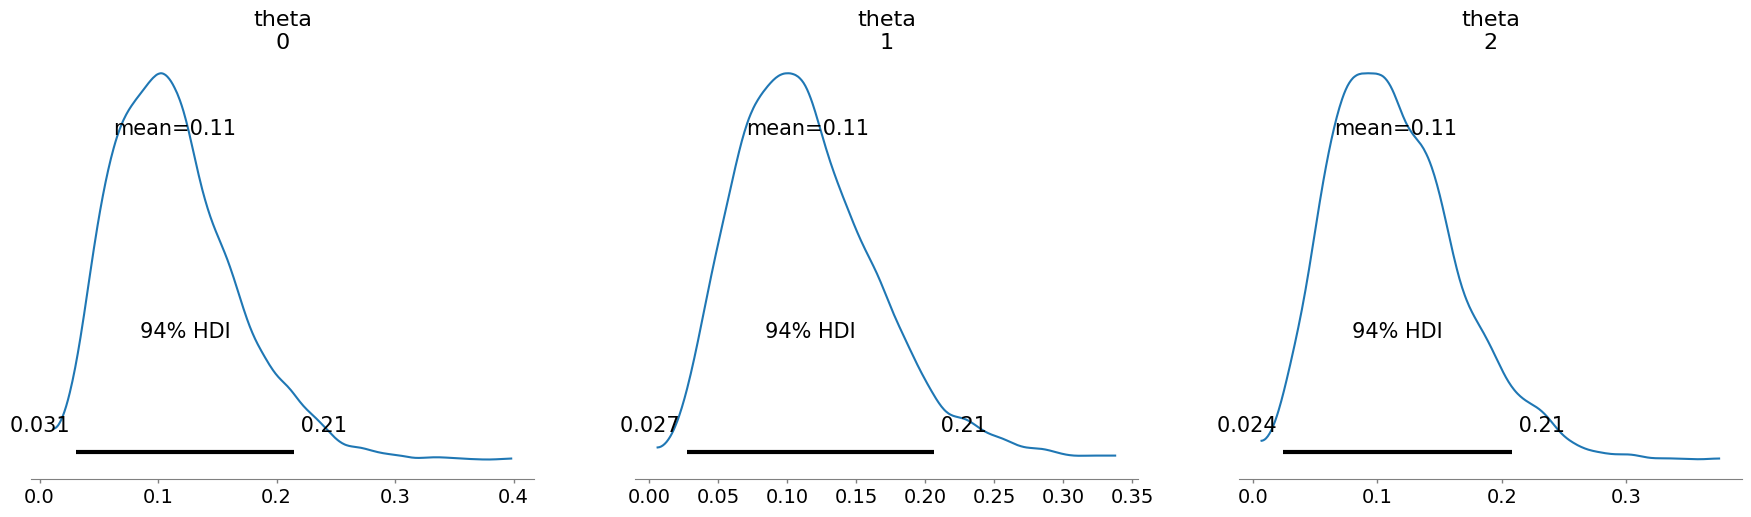

In [ ]:
#running two additional models
#new data for each one
N_samples = [30, 30, 30]
G_samples = [3, 3, 3]
group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
data = []
for i in range(0, len(N_samples)):
  data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]-G_samples[i]]))

with pm.Model(coords = coords) as model_h2:
  # hypyerpriors
  mu = pm.Beta('mu', 1, 1)
  nu = pm.HalfNormal('nu', 10)
  # prior
  theta = pm.Beta('theta', mu=mu, nu=nu, dims = "neighborhood")
  # likelihood
  y = pm.Bernoulli('y', p=theta[group_idx], observed = data, dims = "neighborhood_data")

  idata_h2 = pm.sample(1000, chains = 4)

#trace data
az.plot_trace(idata_h2, compact = False)
plt.subplots_adjust(hspace=0.6)  # Increase spacing between subplots

plt.savefig("tracegroup2.png", bbox_inches='tight')
files.download("tracegroup2.png")

#hdi and mean
az.plot_posterior(idata_h2, var_names=["theta"])

plt.savefig("hdi2.png", bbox_inches='tight')
files.download("hdi2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

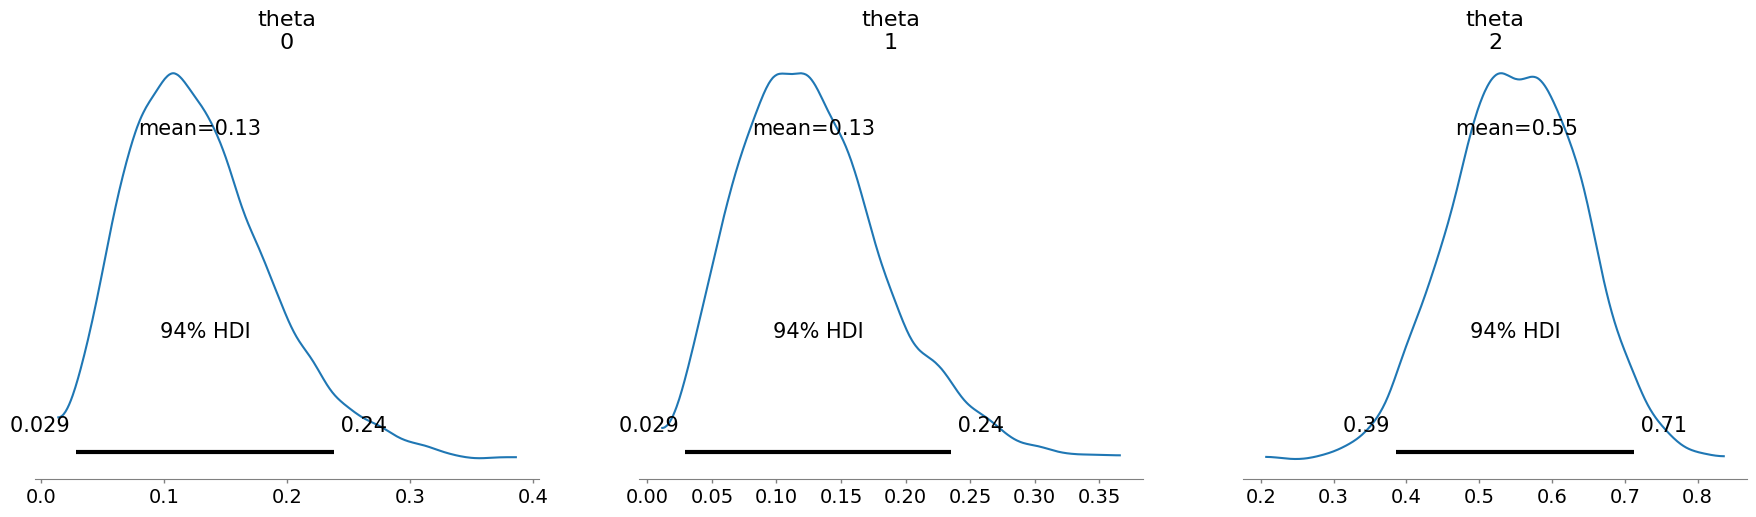

In [ ]:
#last one
N_samples = [30, 30, 30]
G_samples = [3, 3, 18]
group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
data = []
for i in range(0, len(N_samples)):
  data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]-G_samples[i]]))

with pm.Model(coords = coords) as model_h3:
  # hypyerpriors
  mu = pm.Beta('mu', 1, 1)
  nu = pm.HalfNormal('nu', 10)
  # prior
  theta = pm.Beta('theta', mu=mu, nu=nu, dims = "neighborhood")
  # likelihood
  y = pm.Bernoulli('y', p=theta[group_idx], observed = data, dims = "neighborhood_data")

  idata_h3 = pm.sample(1000, chains = 4)

#trace data
az.plot_trace(idata_h3, compact = False)
plt.subplots_adjust(hspace=0.6)  # Increase spacing between subplots

plt.savefig("tracegroup3.png", bbox_inches='tight')
files.download("tracegroup3.png")

#hdi and mean
az.plot_posterior(idata_h3, var_names=["theta"])

plt.savefig("hdi3.png", bbox_inches='tight')
files.download("hdi3.png")

### Multiple Regression

#### Loading and Setting Up Data

Loading data

In [2]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/BayesianModelingandComputationInPython/BookCode_Edition1/main/exercises/data/radon.csv','radon.csv')

radon = pd.read_csv('radon.csv')
radon

,Unnamed: 0,idnum,state,state2,stfips,zip,region,typebldg,floor,room,...,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,...,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,...,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,...,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,...,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,...,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,914,5995.0,MN,MN,27.0,55363,5.0,1.0,0.0,4.0,...,4.5,1146.499190,0.0,0.0,171.0,WRIGHT,27171.0,0.913909,83,1.871802
915,915,5996.0,MN,MN,27.0,55376,5.0,1.0,0.0,7.0,...,8.3,1105.956867,0.0,0.0,171.0,WRIGHT,27171.0,0.913909,83,1.526056
916,916,5997.0,MN,MN,27.0,55376,5.0,1.0,0.0,4.0,...,5.2,1214.922779,0.0,0.0,171.0,WRIGHT,27171.0,0.913909,83,1.629241
917,917,5998.0,MN,MN,27.0,56297,5.0,1.0,0.0,4.0,...,9.6,1177.377355,0.0,0.0,173.0,YELLOW MEDICINE,27173.0,1.426590,84,1.335001


Extract data from the table

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

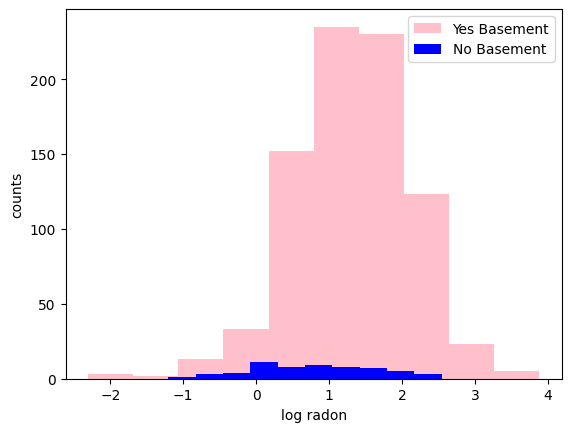

In [3]:
radon_know_b = radon[radon["basement"].isin(["Y","N"])] #only get rows with all the necessary data
b = radon_know_b["basement"]
b_idx,b_codes = pd.factorize(b)
r = radon_know_b["log_radon"] #the level of randon

#so b is yes or no basement, and r is the level of randon in each case

#look at the data
plt.hist(r[b == 'Y'], color = 'pink', label = 'Yes Basement')
plt.hist(r[b == 'N'], color = 'blue', label = 'No Basement')
plt.legend()
plt.xlabel('log radon')
plt.ylabel('counts')

plt.savefig("data.png", bbox_inches='tight')
files.download("data.png")

#### Creating Model

Priors

In [4]:
# Parameters for normal prior for β_0, the intercept
μ_0 = np.mean(r)
σ_0 = np.std(r)
# Parameter for zero-centered normal prior for β_b, the effect of having a basement
σ_b = np.std(r)
# Parameters for gamma prior for σ_r, the unnexplained noise
μ_σ_r = np.std(r)
σ_σ_r = np.std(r)/2

Model

In [5]:
c_basement = {"basement": b_codes, "data": np.arange(len(r))}

with pm.Model(coords=c_basement) as m_basement:
  b_i = pm.Data('b_i', b_idx, dims="data")

  β_0 = pm.Normal('β_0', mu=μ_0, sigma=σ_0)
  β_b = pm.Normal('β_b', mu=0, sigma=σ_b, dims="basement")

  μ_r = pm.Deterministic('μ_r', β_0 + β_b[b_i], dims="data")
  σ_r = pm.Gamma('σ_r', mu=μ_σ_r, sigma=σ_σ_r)
  r_obs = pm.Normal('r_obs', mu=μ_r, sigma=σ_r, observed=r, dims="data")

#### Prior Predictive Checks

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

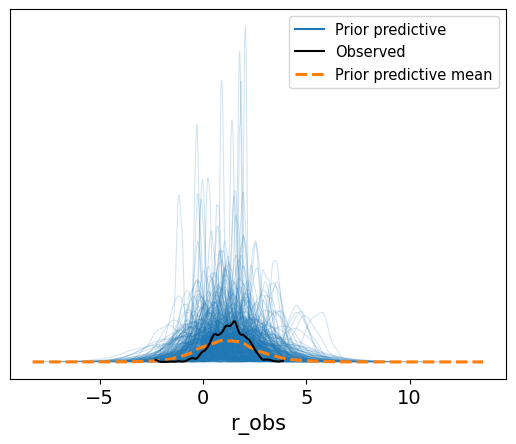

In [6]:
id_basement = pm.sample_prior_predictive(model=m_basement)
az.plot_ppc(id_basement, group="prior",  observed=True)

plt.savefig("ppc.png", bbox_inches='tight')
files.download("ppc.png")

#### Sample


In [7]:
id_basement.extend(
    pm.sample(draws=1000, chains=4, model=m_basement)
)

id_basement

Output()

Inference data with groups:
	> posterior
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

Examining the Posterior and Diagnostics

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

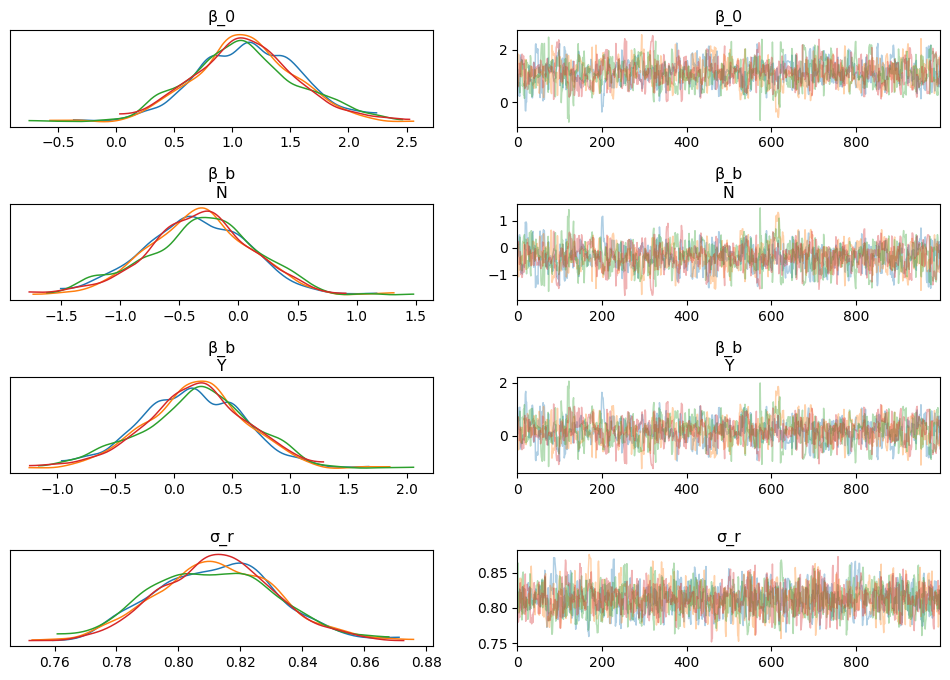

In [8]:
az.plot_trace(id_basement, var_names = ["β_0", "β_b", "σ_r"], compact = False)
plt.subplots_adjust(hspace=0.8)  # Increase spacing between subplots

plt.savefig("trace.png", bbox_inches='tight')
files.download("trace.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

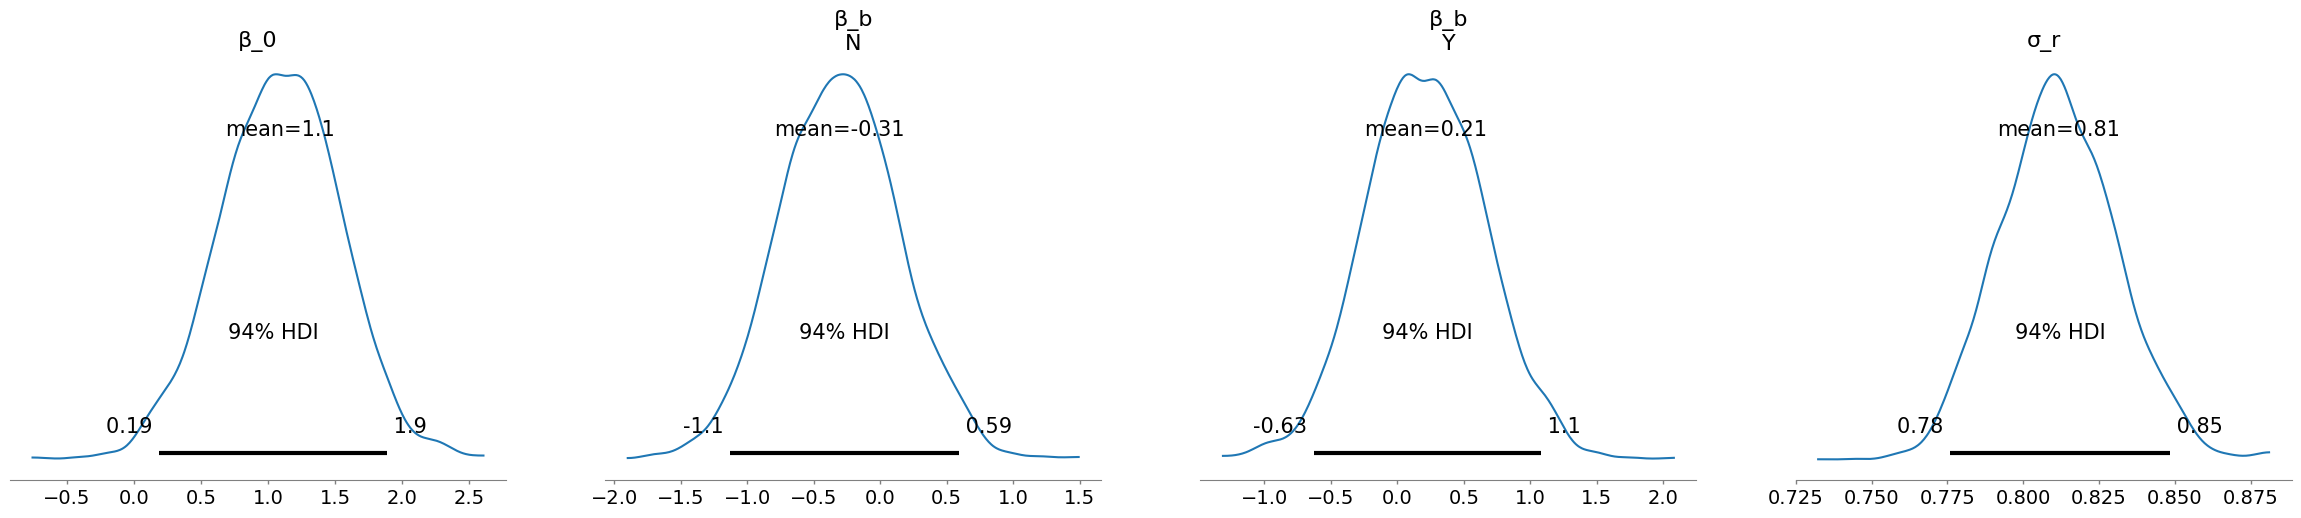

In [ ]:
#plotting the posterior with the HDI
az.plot_posterior(id_basement, var_names = ["β_0", "β_b", "σ_r"])

plt.savefig("hdi.png", bbox_inches='tight')
files.download("hdi.png")

In [ ]:
az.summary(id_basement, kind="diagnostics", var_names=["β_0", "β_b", "σ_r"])

,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β_0,0.014,0.011,1126.0,1365.0,1.0
β_b[N],0.014,0.010,1149.0,1415.0,1.0
β_b[Y],0.014,0.011,1121.0,1385.0,1.0
σ_r,0.001,0.000,1392.0,1371.0,1.0


#### Posterior Predictive

Output()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

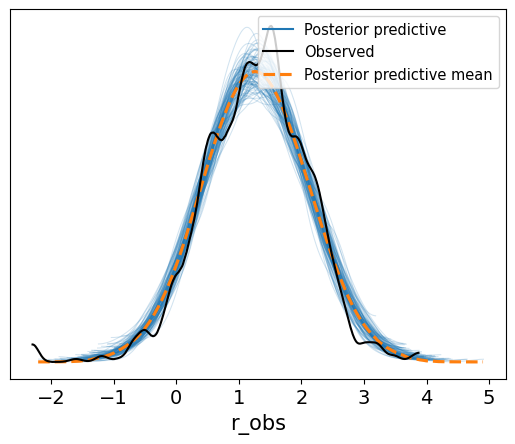

In [9]:
pm.sample_posterior_predictive(id_basement, model=m_basement, extend_inferencedata=True)
az.plot_ppc(id_basement, num_pp_samples=100)

plt.savefig("ppc2.png", bbox_inches='tight')
files.download("ppc2.png")

#### Posterior Inference

In [10]:
id_basement.posterior["μ_b"] = id_basement.posterior.β_0 + id_basement.posterior.β_b

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

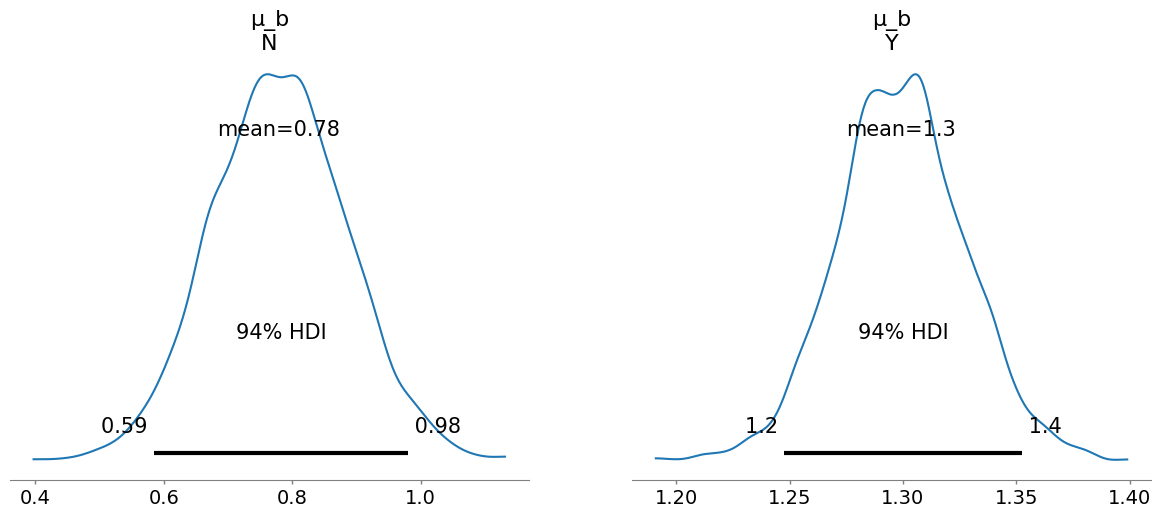

In [11]:
az.plot_posterior(id_basement, var_names=["μ_b"])
plt.savefig("basementmean.png", bbox_inches='tight')
files.download("basementmean.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

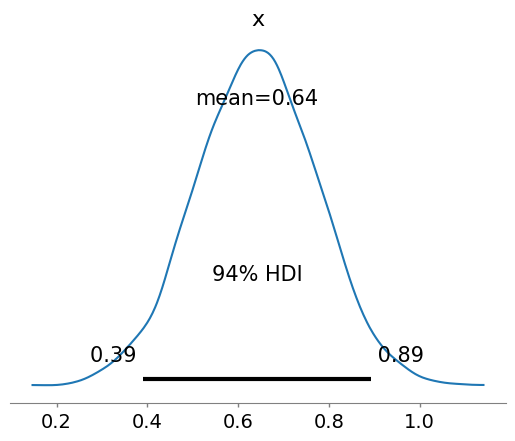

In [12]:
#cohen's d
cohen_d = (id_basement.posterior.sel(basement='Y').μ_b - id_basement.posterior.sel(basement='N').μ_b) / id_basement.posterior.σ_r
az.plot_posterior(cohen_d)
plt.savefig("d.png", bbox_inches='tight')
files.download("d.png")

#### Adding County Data

Getting the data

In [13]:
c = radon_know_b["county"]
c_idx,c_codes = pd.factorize(c)

Examining

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

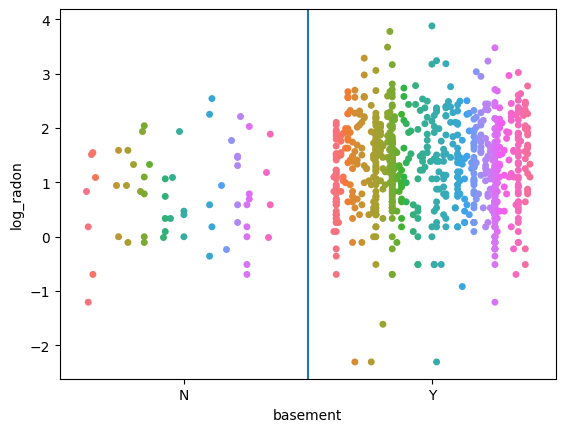

In [14]:
ax = sns.stripplot(x=b, y=r, hue=c, dodge=True, jitter=False)
ax.axvline(0.5)
plt.legend([],[], frameon=False)
plt.savefig("countydata.png", bbox_inches='tight')
files.download("countydata.png")

##### Priors

In [15]:
# Looking at the data above, difference between counties could be as much as 1
μ_σ_c = 1
σ_σ_c = 0.8

##### Model - Not Heirarchical

In [16]:
c_county = {"basement": b_codes, "county": c_codes, "data": np.arange(len(r))}

with pm.Model(coords=c_county) as m_county1:
  b_i = pm.Data('b_i', b_idx, dims="data")
  c_i = pm.Data('c_i', c_idx, dims="data")

  β_0 = pm.Normal('β_0', mu=μ_0, sigma=σ_0)
  β_b = pm.Normal('β_b', mu=0, sigma=σ_b, dims="basement")
  β_c = pm.Normal('β_c', mu=0, sigma=μ_σ_c, dims="county")

  μ_r = pm.Deterministic('μ_r', β_0 + β_c[c_i] + β_b[b_i], dims="data")
  σ_r = pm.Gamma('σ_r', mu=μ_σ_r, sigma=σ_σ_r)
  r_obs = pm.Normal('r_obs', mu=μ_r, sigma=σ_r, observed=r, dims="data")

##### Prior Predictive Check

<Axes: xlabel='r_obs'>

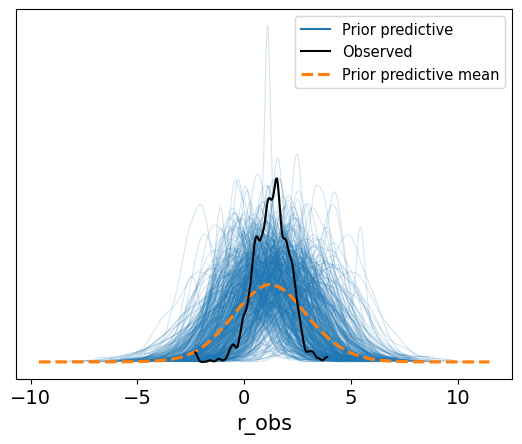

In [17]:
id_county = pm.sample_prior_predictive(model=m_county1)
az.plot_ppc(id_county, group="prior", observed = True)

##### Sample and Diagnostics

In [18]:
id_county.extend(
    pm.sample(draws=1000, chains=4, model=m_county1)
)
id_county

Output()

Inference data with groups:
	> posterior
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

In [ ]:
az.summary(id_county, kind="diagnostics", var_names= ["β_0", "β_b", "β_c", "σ_r"] )

,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β_0,0.015,0.008,1136.0,2080.0,1.00
β_b[N],0.014,0.008,1260.0,2204.0,1.00
β_b[Y],0.014,0.007,1208.0,2186.0,1.00
β_c[AITKIN],0.007,0.006,2658.0,2461.0,1.00
β_c[ANOKA],0.006,0.003,615.0,1326.0,1.01
...,...,...,...,...,...
β_c[WILKIN],0.009,0.011,4971.0,2470.0,1.00
β_c[WINONA],0.007,0.004,1201.0,2273.0,1.00
β_c[WRIGHT],0.007,0.004,1184.0,2407.0,1.00
β_c[YELLOW MEDICINE],0.007,0.008,4190.0,3117.0,1.00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

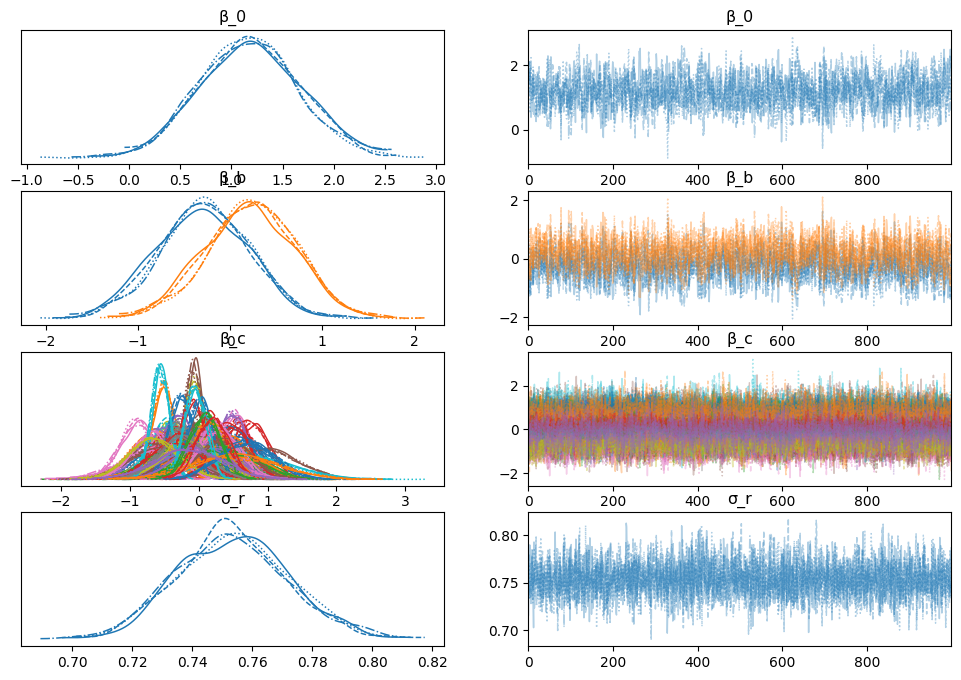

In [ ]:
az.plot_trace(id_county, var_names=["β_0", "β_b", "β_c", "σ_r"])
plt.savefig("kde2.png", bbox_inches='tight')
files.download("kde2.png")

##### Posterior Predictive

Output()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

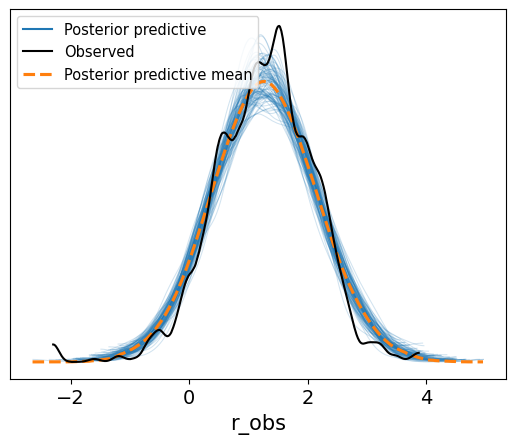

In [19]:
pm.sample_posterior_predictive(id_county, model=m_county1, extend_inferencedata=True)
az.plot_ppc(id_county, num_pp_samples=100)
plt.savefig("ppc4.png", bbox_inches='tight')
files.download("ppc4.png")

##### Posterior Inference

In [27]:
r_c = radon_know_b.groupby("county")["log_radon"].mean()
post = id_county.posterior
post["μ_c"] = post.β_0 + post.β_c #+ post.β_b.sel(basement = 'Y')
post["μ_b"] = post.β_0 + post.β_b

<ipython-input-28-1c9aa554c27c>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  az.plot_lm(y=r_c[sorted_indices], x=np.arange(len(r_c)), y_model=a, kind_model="hdi", kind_pp="hdi", y_model_mean_kwargs={"linestyle": "none", "marker": "o"})


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

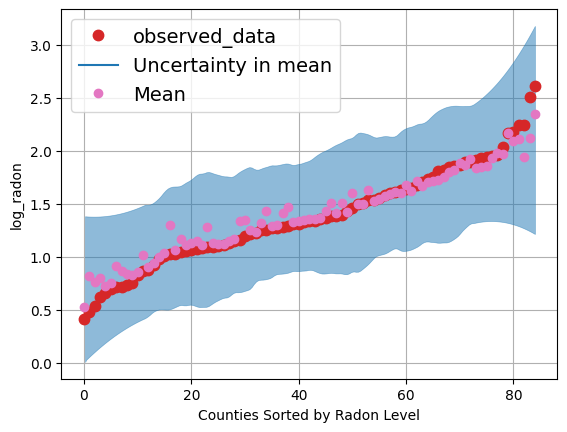

In [28]:
sorted_indices = np.argsort(r_c.values)
a = post["μ_c"].isel(county = sorted_indices)
az.plot_lm(y=r_c[sorted_indices], x=np.arange(len(r_c)), y_model=a, kind_model="hdi", kind_pp="hdi", y_model_mean_kwargs={"linestyle": "none", "marker": "o"})
plt.xlabel('Counties Sorted by Radon Level')
plt.savefig("lm.png", bbox_inches='tight')
files.download("lm.png")

##### Effect of Basement

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

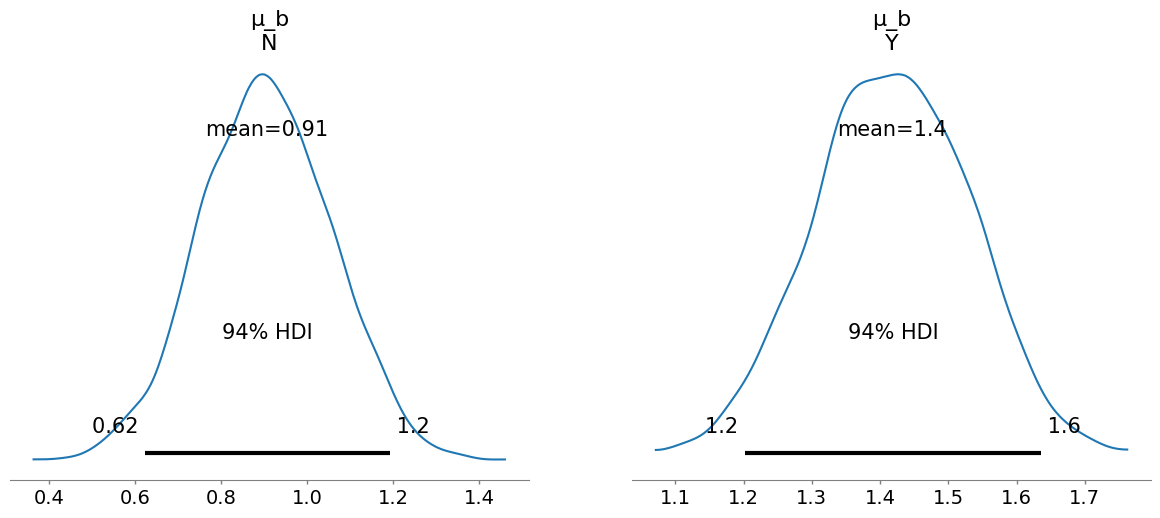

In [22]:
az.plot_posterior(id_county, var_names=["μ_b"])
plt.savefig("b.png", bbox_inches='tight')
files.download("b.png")

#### Hierarchical Model

In [31]:
c_county = {"basement": b_codes, "county": c_codes, "data": np.arange(len(r))}

with pm.Model(coords=c_county) as m_county:
  b_i = pm.Data('b_i', b_idx, dims="data")
  c_i = pm.Data('c_i', c_idx, dims="data")

  σ_c = pm.Gamma('σ_c', mu=μ_σ_c, sigma=σ_σ_c)

  β_0 = pm.Normal('β_0', mu=μ_0, sigma=σ_0)
  β_b = pm.Normal('β_b', mu=0, sigma=σ_b, dims="basement")
  β_c = pm.Normal('β_c', mu=0, sigma=σ_c, dims="county")

  μ_r = pm.Deterministic('μ_r', β_0 + β_c[c_i] + β_b[b_i], dims="data")
  σ_r = pm.Gamma('σ_r', mu=μ_σ_r, sigma=σ_σ_r)
  r_obs = pm.Normal('r_obs', mu=μ_r, sigma=σ_r, observed=r, dims="data")

##### Prior Predictive Checks

<Axes: xlabel='r_obs'>

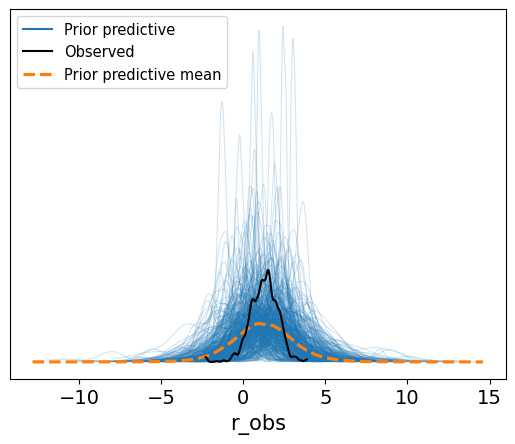

In [32]:
id_county = pm.sample_prior_predictive(model=m_county)
az.plot_ppc(id_county, group="prior", observed = True)

##### Sample and Diagnostics

In [33]:
id_county.extend(
    pm.sample(draws=1000, chains=4, model=m_county)
)
id_county

Output()

Inference data with groups:
	> posterior
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

In [ ]:
az.summary(id_county, kind="diagnostics", var_names= ["β_0", "β_b", "β_c", "σ_c", "σ_r"] )

,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β_0,0.013,0.007,1381.0,2478.0,1.0
β_b[N],0.013,0.007,1430.0,2277.0,1.0
β_b[Y],0.013,0.007,1406.0,2420.0,1.0
β_c[AITKIN],0.004,0.004,4473.0,3031.0,1.0
β_c[ANOKA],0.002,0.002,3329.0,2528.0,1.0
...,...,...,...,...,...
β_c[WINONA],0.002,0.003,5350.0,2819.0,1.0
β_c[WRIGHT],0.003,0.003,3667.0,3194.0,1.0
β_c[YELLOW MEDICINE],0.004,0.004,4760.0,2851.0,1.0
σ_c,0.002,0.001,909.0,1402.0,1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

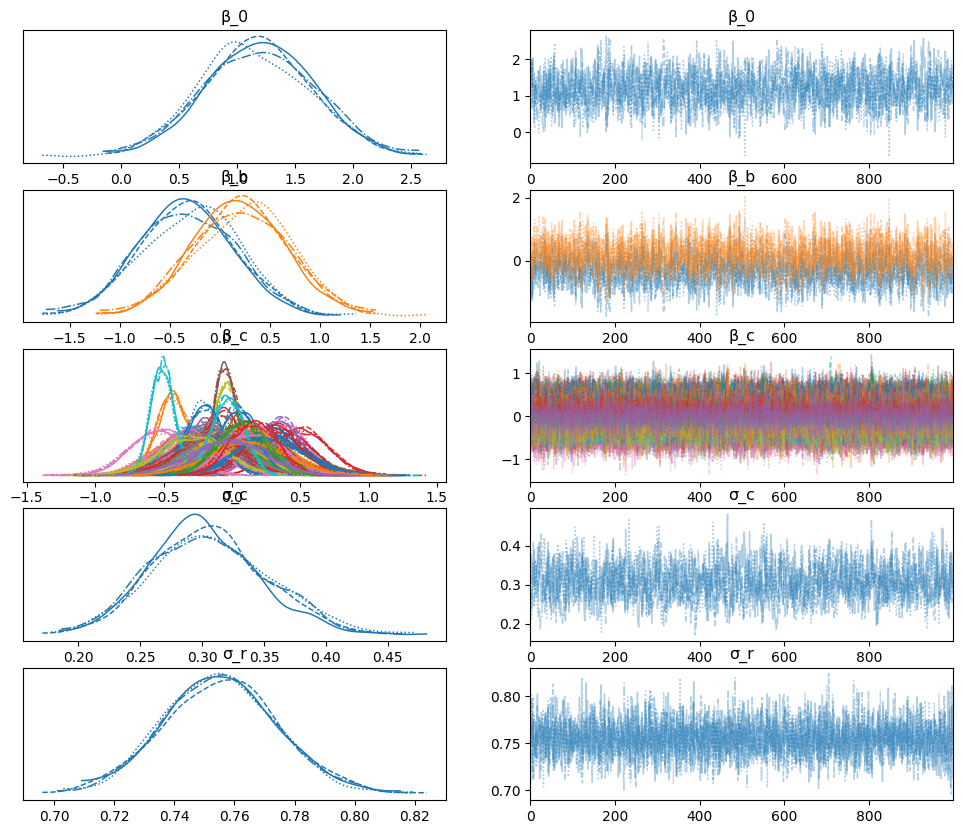

In [ ]:
az.plot_trace(id_county, var_names=["β_0", "β_b", "β_c", "σ_c", "σ_r"])
plt.savefig("kde.png", bbox_inches='tight')
files.download("kde.png")

##### Posterior Predictive

Output()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

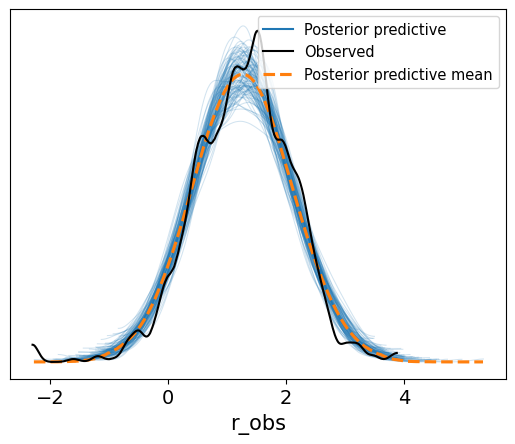

In [34]:
pm.sample_posterior_predictive(id_county, model=m_county, extend_inferencedata=True)
az.plot_ppc(id_county, num_pp_samples=100)
plt.savefig("ppc3.png", bbox_inches='tight')
files.download("ppc3.png")

##### Posterior Inference

Effect of Hierarchical Model

In [35]:
r_c = radon_know_b.groupby("county")["log_radon"].mean()
post = id_county.posterior
post["μ_c"] = post.β_0 + post.β_c
post["μ_b"] = post.β_0 + post.β_b

<ipython-input-36-1c9aa554c27c>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  az.plot_lm(y=r_c[sorted_indices], x=np.arange(len(r_c)), y_model=a, kind_model="hdi", kind_pp="hdi", y_model_mean_kwargs={"linestyle": "none", "marker": "o"})


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

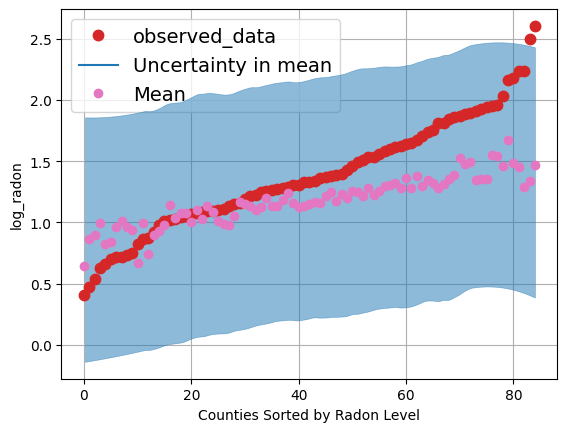

In [36]:
sorted_indices = np.argsort(r_c.values)
a = post["μ_c"].isel(county = sorted_indices)
az.plot_lm(y=r_c[sorted_indices], x=np.arange(len(r_c)), y_model=a, kind_model="hdi", kind_pp="hdi", y_model_mean_kwargs={"linestyle": "none", "marker": "o"})
plt.xlabel('Counties Sorted by Radon Level')
plt.savefig("lm.png", bbox_inches='tight')
files.download("lm.png")

Effect of Basement

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

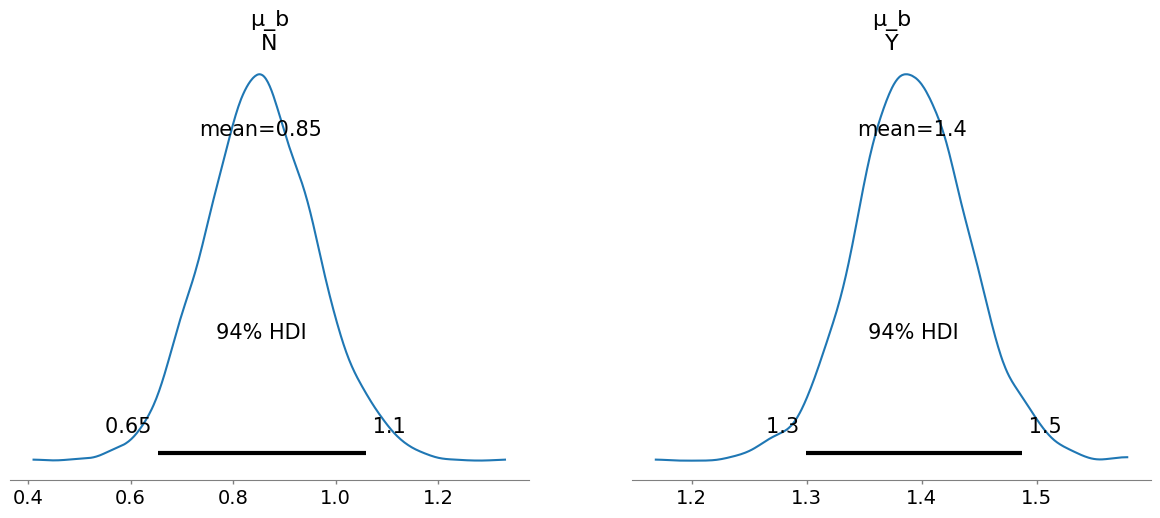

In [37]:
az.plot_posterior(id_county, var_names=["μ_b"])
plt.savefig("b.png", bbox_inches='tight')
files.download("b.png")